# Health Insurance Cost Prediction

Health insurance plays a crucial role in safeguarding individuals and families against the unpredictable costs of medical care. It serves as a financial safety net, providing coverage for a range of healthcare services, from routine check-ups to unforeseen medical emergencies. By contributing to the overall well-being of individuals, health insurance not only eases the financial burden associated with medical expenses but also promotes a proactive approach to healthcare.

With the Health Insurance Cost Predictor project, I aim to enhance the understanding and accessibility of health insurance by leveraging advanced machine learning techniques to predict insurance costs. This tool empowers users to make informed decisions, promoting financial stability and ensuring that healthcare remains accessible to all. Embrace the future of healthcare planning with Health Insurance Cost Predictor, where data-driven insights meet the importance of a healthy life.

## Objective

The primary objective of the Health Insurance Cost Predictor project is to empower individuals and healthcare professionals with a predictive tool for estimating health insurance costs. By harnessing the capabilities of machine learning, the goal is to provide accurate and insightful predictions based on various factors influencing health insurance expenses.

This project aims to enhance financial planning in healthcare, allowing users to make informed decisions about their insurance coverage. Through detailed data analysis and predictive modeling, we seek to demystify the complex landscape of health insurance, making it more accessible and transparent. Ultimately, Health Insurance Helper strives to contribute to the well-being of individuals by promoting financial security and facilitating proactive healthcare planning.

## Dataset Overview

**age**: age of the primary beneficiary

**sex**: insurance contractor gender, female, male

**bmi**: Body Mass Index, providing an understanding of body weights that are relatively high or low relative to height, objective index of body weight (kg/m²) using the ratio of height to weight, ideally 18.5 to 24.9

**children**: number of children covered by health insurance, number of dependents

**smoker**: smoking or not

**region**: the beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

**charges**: individual medical costs billed by health insurance

Our dataset has 6 independant variables and 1 dependant variable charges which is the price of health inssurance.

## Data Collection

In [1]:
# importing libraries for data manipulation
import numpy as np
import pandas as pd

# importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# reading excel file as pandas DataFrame
df=pd.read_excel('Health_insurance_cost.xlsx')
df.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [3]:
df.tail()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1333,50.0,male,30.97,3,no,northwest,10600.5483
1334,18.0,female,31.92,0,no,northeast,2205.9808
1335,18.0,female,36.85,0,no,southeast,1629.8335
1336,21.0,female,25.80,0,no,southwest,2007.9450
1337,61.0,female,29.07,0,yes,northwest,29141.3603


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


We have some missing values.out of all the features 3 features are categorical and other 4 are numerical.

In [5]:
# shape of the dataset
df.shape

(1338, 7)

In [6]:
# statistical summary of columns
df.describe(include='all')

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
count,1310.000000,1338,1315.000000,1338.000000,1338,1338,1336.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.166412,NaN,30.638217,1.094918,NaN,NaN,13268.527719
std,14.055378,NaN,6.110302,1.205493,NaN,NaN,12112.797724
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.210000,0.000000,NaN,NaN,4744.325050
50%,39.000000,NaN,30.305000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.580000,2.000000,NaN,NaN,16604.302645


In [7]:
# checking for duplicate records
df.duplicated().sum()

1

In [8]:
# dropping duplicate records
df.drop_duplicates(inplace=True)

In [9]:
# checking number of unique observations in each column.
df.nunique()

age                         47
gender                       2
BMI                        545
Children                     6
smoking_status               2
location                     4
health_insurance_price    1335
dtype: int64

### Handling missing values

In [10]:
# finding sum of missing values in each column.
df.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

Age column has 28 and bmi column has 23 missing values.As health_insurance_price is our dependant variable i'll remove missing values from it.

In [11]:
# dropping null values from target column.
df.dropna(subset=['health_insurance_price'],inplace=True)

#### Missing values Imputation

In [12]:
# importing library KNNImputer
from sklearn.impute import KNNImputer

# Columns to impute
columns_to_impute = ['age', 'BMI']

# creating object of class KNNImputer
knn_imputer = KNNImputer()

# Using KNNImputer to impute values
df[columns_to_impute]=knn_imputer.fit_transform(df[columns_to_impute])

In [13]:
df.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

Now the dataset has zero missing values.

## EDA

In [14]:
# calculate value counts
x = df['gender'].value_counts()

# Create Pie chart using Plotly
fig = px.pie(x, names=x.index, title='Gender Distribution', labels=x.index, values=x.values,hole=0.3,width=700,height=400)

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


The gender column as almost balanced.

In [15]:
# calculate value counts for location column
x = df['location'].value_counts()

# Create Pie chart using Plotly to check distribution of location
fig=px.pie(x,names=x.index,labels=x.index,title='Distribution of Location',values=x.values,hole=0.3,width=700,height=400)

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [16]:
# calculate value counts for smoking status column
x = df['smoking_status'].value_counts()

# Create Pie chart using Plotly to check distribution of Smoking Status
fig=px.pie(x,names=x.index,labels=x.index,title='Distribution of Smoking Status',values=x.values,hole=0.4,width=700,height=400)

# Show the plot
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



The majority of individuals in the dataset have a 'No Smoking' status, accounting for around 80% of the entries, while 20% of the entries indicate a 'Yes Smoking' status.

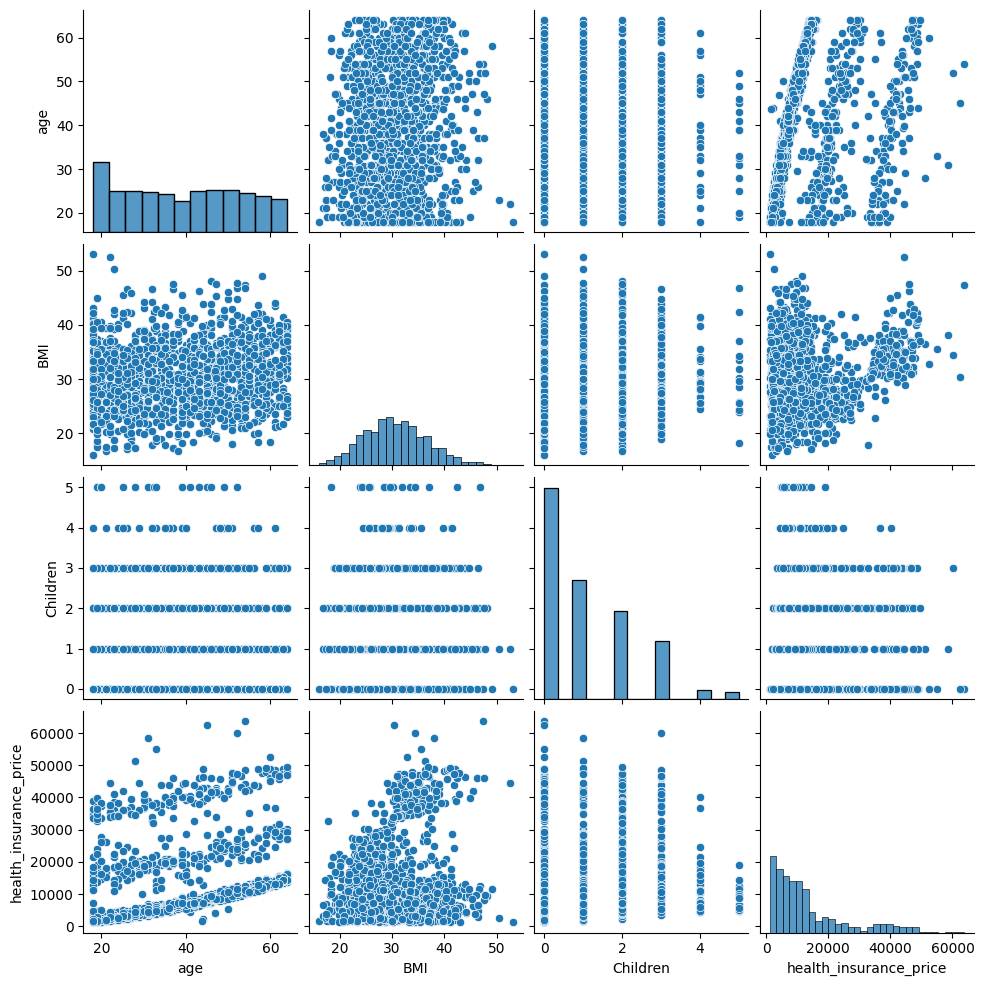

In [17]:
sns.pairplot(df)

In [18]:
# Create histogram using Plotly to check distribution of health insurance by age and gender
fig = px.histogram(df, x='age', y='health_insurance_price',color="gender",nbins=20 ,width=800, height=400,title="Distribution of health insurance price by age and gender")

# Show the plot
fig.show()

In [19]:
# creating box plot for age
fig = px.box(df, y="age", width=800, height=400,title="Age Distribution")

# Show the plot
fig.show()

Seems age column is normaly distributed and there are no outliers.

In [20]:
# creating box plot for BMI
fig = px.box(df, y="BMI", width=800, height=400,title="BMI Distribution")

# Show the plot
fig.show()

There are some outliers in the BMI column. Let's fix them using IQR technique.



In [21]:
# find Q1, median and Q3
Q1 = np.percentile(df['BMI'], 25)
Q2 = np.percentile(df['BMI'], 50)
Q3 = np.percentile(df['BMI'], 75)

In [22]:
# finding Inter Quartile Range
IQR = Q3 - Q1
print('Interquartile range is', IQR)

# calculate lower limit
low_lim = Q1 - 1.5 * IQR
print('low_limit is', low_lim)

# calculate upper limit
up_lim = Q3 + 1.5 * IQR
print('up_limit is', up_lim)

# checking outliers which are below lower limit or above upper limit
outlier =[]
for x in df['BMI']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

Interquartile range is 8.182499999999997
low_limit is 14.028750000000006
up_limit is 46.75874999999999
 outlier in the dataset is [49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13]


In [23]:
# clipping outliers
df['BMI']=df['BMI'].clip(lower=low_lim,upper=up_lim)

In [24]:
# importing library
import plotly.figure_factory as ff

colors = ['#325F44']

# Create distplot
hist_data = [df['BMI']]
group_labels = ['BMI'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels,colors=colors)
fig.update_layout(height=400, width=800,title_text='Distribution Plot Of BMI')
fig.show()

In [25]:
df['BMI'].skew()

0.2340236679115527

A skewness value of 0.23402, being positive, indicates a rightward or positive skew, but the magnitude of this skewness is not large.

In [26]:
# creating box plot for target column health insurance cost
fig = px.box(df, y="health_insurance_price", width=800, height=400,title="Health insurance cost Distribution")
fig.show()

On average, 'health_insurance_price' tends to be lower, but there are some instances with much higher prices, pulling the distribution to the right

In [27]:
from scipy import stats

z_scores = stats.zscore(df['health_insurance_price'])
df = df[(z_scores < 3) & (z_scores > -3)]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1328 non-null   float64
 1   gender                  1328 non-null   object 
 2   BMI                     1328 non-null   float64
 3   Children                1328 non-null   int64  
 4   smoking_status          1328 non-null   object 
 5   location                1328 non-null   object 
 6   health_insurance_price  1328 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.0+ KB


In [29]:
# scatter plot
fig=px.scatter(df,x='BMI',y='health_insurance_price', color='gender',width=800, height=400,labels={'BMI': 'BMI', 'health_insurance_price': 'Health Insurance Price'},title="BMI vs. Health Insurance Price by Gender")
fig.show()

In [30]:
# plotting histogram to see distribution of Health Insurance Price by Gender and Smoking Status
fig = px.histogram(df, x='gender', y='health_insurance_price', color='smoking_status',
                   title='Health Insurance Price by Gender and Smoking Status',
                   labels={'gender': 'Gender', 'health_insurance_price': 'Health Insurance Price'},
                   category_orders={'gender': ['Male', 'Female'], 'smoking_status': ['Yes', 'No']},
                   barmode='group', width=800, height=400)

fig.show()

In [31]:
import plotly.graph_objects as go

correlation_matrix = df.corr()

# Create a heatmap
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='Viridis',
    colorbar=dict(title='Correlation'),
    text=np.around(correlation_matrix.values, decimals=2),  # Display values with 2 decimal places
))

# Update layout for better visualization
fig.update_layout(title='Correlation Matrix',
                  xaxis=dict(title='Features'),
                  yaxis=dict(title='Features'))

# Show the plot
fig.show()

<ipython-input-31-d0f982e8ebb4>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



we can see age has high correlation with health insurance price which is 0.305.

In [32]:
df1=df.copy()

Let's  drop location as it does not making any sense

In [33]:
df1.drop(['location'],axis=1,inplace=True)

In [34]:
# one hot encoding for categorical column
df1=pd.get_dummies(df1,columns=['gender','smoking_status'],drop_first=True)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1328 non-null   float64
 1   BMI                     1328 non-null   float64
 2   Children                1328 non-null   int64  
 3   health_insurance_price  1328 non-null   float64
 4   gender_male             1328 non-null   uint8  
 5   smoking_status_yes      1328 non-null   uint8  
dtypes: float64(3), int64(1), uint8(2)
memory usage: 54.5 KB


###Splitting Independant & Dependant features

In [36]:
X=df1.drop('health_insurance_price',axis=1)
y=df1['health_insurance_price']

In [37]:
X.head()

,age,BMI,Children,gender_male,smoking_status_yes
0,19.0,25.830,0,0,1
1,18.0,33.770,1,1,0
2,28.0,33.000,3,1,0
3,33.0,22.705,0,1,0
4,32.0,28.880,0,1,0


##Feature Selection

Feature: 0, Score: 0.13716
Feature: 1, Score: 0.21582
Feature: 2, Score: 0.02210
Feature: 3, Score: 0.00681
Feature: 4, Score: 0.61811


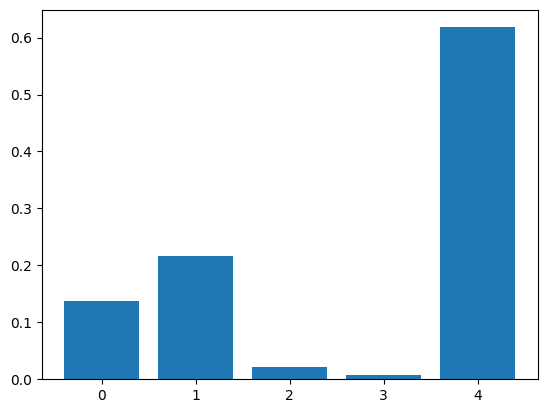

In [38]:
# Feature Importance
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

As gender column is not that important in predicting health insurance price i will remove them all.

In [39]:
X.drop(['gender_male'],axis=1,inplace=True)

### Splitting training & testing data

In [40]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler
# making object of class
scaler = StandardScaler()

# Scale the features
xtrain_scaled = scaler.fit_transform(x_train)
xtest_scaled = scaler.transform(x_test)

# Display the scaled dataset
xtrain_scaled

array([[-0.97519858, -2.29702006,  0.76803599,  2.0023571 ],
       [ 0.68500024, -0.06356204, -0.91546086, -0.49941142],
       [ 1.19027814,  0.87379158, -0.07371243, -0.49941142],
       ...,
       [ 0.25190489, -0.48963186, -0.91546086,  2.0023571 ],
       [ 0.03535722, -0.13173321,  0.76803599, -0.49941142],
       [-0.90301603,  2.59511367,  0.76803599, -0.49941142]])

## Building Model

##Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,mean_absolute_error,r2_score

lmodel=LinearRegression()

lmodel.fit(xtrain_scaled,y_train)

# Make predictions on the test set
y_pred = lmodel.predict(xtest_scaled)
y_pred_train=lmodel.predict(xtrain_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2_lr = r2_score(y_test, y_pred)
r2_train_lr = r2_score(y_train, y_pred_train)
cv_lr=cross_val_score(lmodel,X,y,cv=5,).mean()

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'train accuracy(R²): {r2_train_lr}')
print(f'test accuracy(R²): {r2_lr}')
print(f'CV Score: {cv_lr}')

Mean Absolute Error (MAE): 3947.979393845297
Mean Squared Error (MSE): 31483973.04128318
Root Mean Squared Error (RMSE): 5611.058103538332
train accuracy(R²): 0.7379787581434987
test accuracy(R²): 0.7710278867183741
CV Score: 0.7432027619635355


The linear regression model seems to have moderate performance. The test accuracy is close to the training accuracy, indicating that it generalizes reasonably well.

##Decision Tree

In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt=DecisionTreeRegressor(random_state=42)

dt.fit(xtrain_scaled,y_train)
y_pred=dt.predict(xtest_scaled)
y_pretrain=dt.predict(xtrain_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
r2t = r2_score(y_train, y_pretrain)
cv=cross_val_score(dt,X,y,cv=5,).mean()

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'train accuracy(R²): {r2t}')
print(f'test accuracy(R²): {r2}')
print(f'CV Score: {cv}')


print("\nHyperparameter tuning:")
estimator=DecisionTreeRegressor(random_state=42)
# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3,4,5,8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid=GridSearchCV(estimator,param_grid,scoring='r2',cv=5)
grid.fit(xtrain_scaled,y_train)
print(grid.best_params_)

dtmodel=DecisionTreeRegressor(random_state=42,max_depth=4,min_samples_leaf=4,min_samples_split=2)
dtmodel.fit(xtrain_scaled,y_train)
y_pred=dtmodel.predict(xtest_scaled)
y_pred_train=dtmodel.predict(xtrain_scaled)

r2_train_dt=r2_score(y_train, y_pred_train)
r2_dt=r2_score(y_test, y_pred)
cv_dt=cross_val_score(dtmodel,X,y,cv=5).mean()

print(f'train accuracy(R²): {r2_train_dt}')
print(f'test accuracy(R²): {r2_dt}')
print(f'CV Score: {cv_dt}')

Mean Absolute Error (MAE): 2775.017877462406
Mean Squared Error (MSE): 32375979.67189373
Root Mean Squared Error (RMSE): 5689.989426342876
train accuracy(R²): 0.9994558444117079
test accuracy(R²): 0.7645406291221264
CV Score: 0.6426707404551323

Hyperparameter tuning:
{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}
train accuracy(R²): 0.847516273878729
test accuracy(R²): 0.8771871379378219
CV Score: 0.8375325388621334


The decision tree model performs well on both training and test sets. The high test accuracy suggests good generalization.

##Random Forest

In [44]:
rf=RandomForestRegressor(random_state=42)

rf.fit(xtrain_scaled,y_train)

# Make predictions on the test set
y_pred = rf.predict(xtest_scaled)
ypred_train=rf.predict(xtrain_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
r2_t = r2_score(y_train, ypred_train)
cv=cross_val_score(rf,X,y,cv=5,).mean()

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'train accuracy(R²): {r2_t}')
print(f'test accuracy(R²): {r2}')
print(f'CV Score: {cv}')

print("\nHyperparameter tuning:")
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,30,50,90,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring='r2',cv=5)
grid.fit(xtrain_scaled,y_train)
print(grid.best_params_)

rfmodel=RandomForestRegressor(random_state=42,n_estimators=120)
rfmodel.fit(xtrain_scaled,y_train)
y_pred_train = rfmodel.predict(xtrain_scaled)
y_pred = rfmodel.predict(xtest_scaled)

r2_rf=r2_score(y_train, y_pred_train)
r2_test_rf=r2_score(y_test, y_pred)
cv_rf=cross_val_score(rfmodel,X,y,cv=5).mean()

print(f'train accuracy(R²): {r2_rf}')
print(f'test accuracy(R²): {r2_test_rf}')
print(f'CV Score: {cv_rf}')

Mean Absolute Error (MAE): 2573.9608548431966
Mean Squared Error (MSE): 20333597.13814931
Root Mean Squared Error (RMSE): 4509.27900424772
train accuracy(R²): 0.9714074892342259
test accuracy(R²): 0.8521207377088545
CV Score: 0.8115812847471473

Hyperparameter tuning:
{'n_estimators': 120}
train accuracy(R²): 0.971504440513328
test accuracy(R²): 0.853538506855217
CV Score: 0.8114220759981048


 The random forest model shows high accuracy on the training set but slightly lower accuracy on the test set, indicating potential overfitting. Cross-validation score is also lower, suggesting some variance.

##SVR

In [45]:
from sklearn.svm import SVR

svr=SVR()

svr.fit(xtrain_scaled,y_train)

# Make predictions on the test set
y_pred = svr.predict(xtest_scaled)
ypred_train=svr.predict(xtrain_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2_svr = r2_score(y_test, y_pred)
r2_train_svr = r2_score(y_train, ypred_train)
cv_svr=cross_val_score(svr,X,y,cv=5,).mean()

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'train accuracy(R²): {r2_train_svr}')
print(f'test accuracy(R²): {r2_svr}')
print(f'CV Score: {cv_svr}')

Mean Absolute Error (MAE): 8011.180555627303
Mean Squared Error (MSE): 146814340.63590065
Root Mean Squared Error (RMSE): 12116.696770815908
train accuracy(R²): -0.09250615805921258
test accuracy(R²): -0.06773023186658689
CV Score: -0.10123013871811244


The negative accuracies suggest that the SVR model is not performing well. It might be struggling to capture the underlying patterns in the data.

## XGBRegressor

In [46]:
from xgboost import XGBRegressor

xgb=XGBRegressor()

xgb.fit(xtrain_scaled,y_train)

# Make predictions on the test set
y_pred = xgb.predict(xtest_scaled)
ypred_train=xgb.predict(xtrain_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
r2_t = r2_score(y_train, ypred_train)
cv=cross_val_score(xgb,X,y,cv=5,).mean()

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'train accuracy(R²): {r2_t}')
print(f'test accuracy(R²): {r2}')
print(f'CV Score: {cv}')

estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain_scaled,y_train)
print("\nHyperparameter tuning:")
print(grid.best_params_)

xgmodel=XGBRegressor(n_estimators=10,max_depth=3,gamma=0)
xgmodel.fit(xtrain_scaled,y_train)
ypredtrain=xgmodel.predict(xtrain_scaled)
ypredtest=xgmodel.predict(xtest_scaled)

r2_train_xg=r2_score(y_train,ypredtrain)
r2_xg=r2_score(y_test,ypredtest)
cv_xg=cross_val_score(xgmodel,X,y,cv=5,).mean()

print(f"train accuracy: {r2_train_xg}")
print(f"test accuracy: {r2_xg}")
print(f"CV Score: {cv_xg}")

Mean Absolute Error (MAE): 2719.571092824496
Mean Squared Error (MSE): 22977658.102612194
Root Mean Squared Error (RMSE): 4793.501653552671
train accuracy(R²): 0.9922762383195566
test accuracy(R²): 0.832891391212951
CV Score: 0.7843757588065798

Hyperparameter tuning:
{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
train accuracy: 0.8533321877453308
test accuracy: 0.8841290379877833
CV Score: 0.8466617431496264


The XGBoost regression model performs well, with high accuracy on both training and test sets. The cross-validation score is also robust, indicating good generalization

In [47]:
results_df = pd.DataFrame({
        'Model': ['Linear Regression','Decision Tree','Random forest','SVR','XGBRegressor'],
        'Train_Accuracy': [r2_train_lr,r2_train_dt,r2_rf,r2_train_svr,r2_train_xg],  # Assuming higher is better
        'Test_Accuracy': [r2_lr,r2_dt,r2_test_rf,r2_svr,r2_xg],  # Assuming higher is better
        'CV_Score': [cv_lr,cv_dt,cv_rf,cv_svr,cv_xg]
    })

In [48]:
results_df

,Model,Train_Accuracy,Test_Accuracy,CV_Score
0,Linear Regression,0.737979,0.771028,0.743203
1,Decision Tree,0.847516,0.877187,0.837533
2,Random forest,0.971504,0.853539,0.811422
3,SVR,-0.092506,-0.067730,-0.101230
4,XGBRegressor,0.853332,0.884129,0.846662


In [49]:
fig = px.bar(results_df,x='Model',y='CV_Score',height=400,width=800)
fig.show()

Out of all the models XGBoost model is giving the highest accuracy this means predictions made by this model are close to the real values as compared to the other model.